In [1]:
import builtins
original_print = print
def custom_print(*args, **kwargs):
    new_args = []
    for arg in args:
        if isinstance(arg, float):
            new_args.append(f'{arg:.10f}')
        else:
            new_args.append(arg)
    original_print(*new_args, **kwargs)
builtins.print = custom_print

    Year      TH/J
0   2011  0.000002
1   2012  0.000020
2   2013  0.000527
3   2014  0.000815
4   2015  0.001628
5   2016  0.003441
6   2017  0.005339
7   2018  0.008530
8   2019  0.011590
9   2020  0.015166
10  2021  0.017574
11  2022  0.019350
12  2023  0.020779


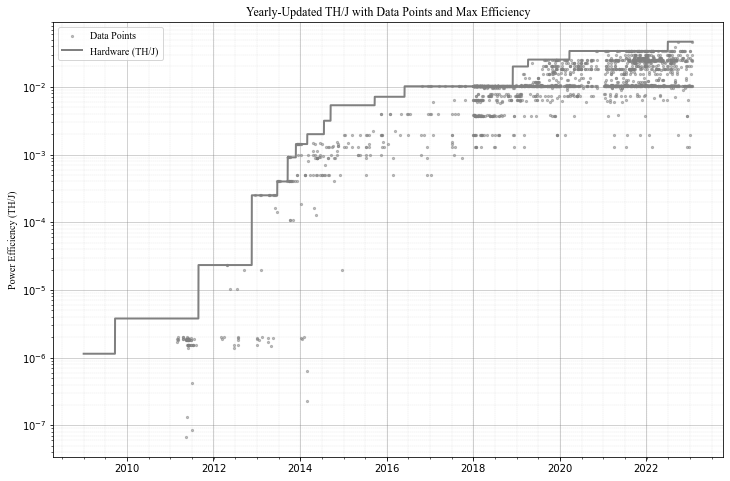

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Define the variable name for the unit power efficiency column
unit_power_efficiency = 'TH/J'

# Load the data for the maximum efficiency for all dates
max_efficiency_table = pd.read_csv('../hardwarelist/Bitcoin max updated2.csv')

# # remove stuff from before 2018
# max_efficiency_table = max_efficiency_table[max_efficiency_table['date'] >= '2018-01-01']

# Assuming the 'Date' column in max_efficiency_table is in a format that can be converted to datetime
max_efficiency_table['date'] = pd.to_datetime(max_efficiency_table['date'])


data = pd.read_csv('datasets/extracted/final3.csv')
data["date"] = data["date"].apply(lambda x: x[:10])
data2 = pd.read_csv('datasets/extracted/pre_2018.csv')
data = pd.concat([data2[["date","row_index","hardware_name","TH/J"]], data[["date","row_index","hardware_name","TH/J"]]])

def get_max_efficiency(date):
    date = str(date)[:10]
    try:
        return max_efficiency_table[max_efficiency_table['date'] == date]['max (TH/J)'].values[0]
    except:
        return -1
    

# delete rows where TH/J is larger than the max efficiency for that date
data['max_efficiency'] = data['date'].apply(lambda x: get_max_efficiency(x))
data = data[data['TH/J'] <= data['max_efficiency']*1.01]

data.to_csv('datasets/extracted/merged.csv', index=False)

# Convert the 'date' column to a datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract year from the 'date' column and create a new column 'year'
data['year'] = data['date'].dt.year

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Extract years from the data
years = data['year'].unique()

# Initialize lists to store yearly 'TH/J' values
th_j_values = []

# Create an empty array to store the regression lines
regression_lines = []

# Iterate over each year, calculate the slope, and store the data
for year in years:
    # Filter data for the current year
    yearly_data = data[data['year'] == year]

    # Fit a linear regression model
    model = LinearRegression()
    X = np.arange(len(yearly_data)).reshape(-1, 1)
    y = yearly_data[unit_power_efficiency]
    model.fit(X, y)

    # Calculate the mean 'TH/J' value for the year
    th_j_mean = yearly_data[unit_power_efficiency].mean()

    # Store the yearly 'TH/J' value
    th_j_values.append(th_j_mean)

    # Store the regression line for the year (point at the end of the year)
    end_of_year_date = yearly_data['date'].max()
    regression_lines.append((end_of_year_date, th_j_mean))

# Create a DataFrame to store the yearly 'TH/J' values and regression points
results = pd.DataFrame({'Year': years, unit_power_efficiency: th_j_values})

# Print the yearly 'TH/J' values
print(results)

plt.rcParams['font.family'] = 'Times New Roman'

# Scatter plot for all data points
plt.scatter(data['date'], data[unit_power_efficiency], c='gray', s=5, label='Data Points', alpha=0.5)

# Plot the regression lines (one point per year)
regression_dates, regression_th_j_values = zip(*regression_lines)
# plt.plot(regression_dates, regression_th_j_values, marker='o', linestyle='-', color='black', label=f'Yearly {unit_power_efficiency} Regression')

# Plot the Hardware (TH/J) line
plt.plot(max_efficiency_table['date'], max_efficiency_table['max (TH/J)'], color='gray', label='Hardware (TH/J)', linewidth=2)

# Plot the Hardware with Archaicity (TH/J) line
# plt.plot(max_efficiency_table['date'], max_efficiency_table['archaicity (TH/J)'].astype(float), color='green', label='Hardware with Archaicity (TH/J)', linewidth=2)


plt.yscale('log')  # Set the y-axis to a logarithmic scale base 10

# # Add year labels with angled text
# for year, th_j_value in zip(years, regression_th_j_values):
#     plt.text(year, th_j_value, str(year), rotation=45, ha='right', va='center', fontsize=10)

plt.ylabel('Power Efficiency (' + unit_power_efficiency + ')', fontname='Times New Roman')
plt.title(f'Yearly-Updated {unit_power_efficiency} with Data Points and Max Efficiency', fontname='Times New Roman')
plt.legend(loc='upper left')

# Enable minor ticks
plt.minorticks_on()

# Add major grid to the plot
plt.grid(True, which='major', axis='both', linestyle='-', linewidth=0.5, color='gray', alpha=0.7)

# Add minor grid to the plot with a lighter style
plt.grid(True, which='minor', axis='both', linestyle=':', linewidth=0.25, color='gray', alpha=0.7)

plt.yticks()
# plt.tight_layout()
plt.show()

In [3]:
# looks like:
# [
#  (Timestamp('2011-08-04 00:00:00'), 1.9952745454545455e-06),
#  (Timestamp('2012-12-31 00:00:00'), 3.2042489473684216e-05),
#  (Timestamp('2013-12-21 00:00:00'), 0.0005635879322033898)
# ]
regression_lines

[(Timestamp('2011-08-04 00:00:00'), 1.6507425925925926e-06),
 (Timestamp('2012-12-31 00:00:00'), 1.993373888888889e-05),
 (Timestamp('2013-12-21 00:00:00'), 0.0005265301428571429),
 (Timestamp('2014-12-18 00:00:00'), 0.0008150532636363637),
 (Timestamp('2015-12-09 00:00:00'), 0.0016275294117647058),
 (Timestamp('2016-12-30 00:00:00'), 0.0034413043478260874),
 (Timestamp('2017-10-25 00:00:00'), 0.005338777777777777),
 (Timestamp('2018-12-28 00:00:00'), 0.008530398618197797),
 (Timestamp('2019-12-29 00:00:00'), 0.011590368879310496),
 (Timestamp('2020-11-15 00:00:00'), 0.015165744845454162),
 (Timestamp('2021-12-31 00:00:00'), 0.017573820731262336),
 (Timestamp('2022-12-31 00:00:00'), 0.01934954748481776),
 (Timestamp('2023-01-24 00:00:00'), 0.020778871298524647)]

In [4]:
df = pd.DataFrame(columns=['date', 'max possible', 'archaicity', 'max found', 'regression'])
df['date'] = max_efficiency_table['date']
df['max possible'] = max_efficiency_table['max (TH/J)']
df['archaicity'] = max_efficiency_table['archaicity (TH/J)']


# finds the 2 closest timestamps in regression_lines and returns the interpolated value
def get_regression(date):
    closest_smaller_timestamp_index = None
    closest_larger_timestamp_index = None
    for (i,(timestamp, value)) in enumerate(regression_lines):
        if timestamp <= date:
            closest_smaller_timestamp_index = i
        else:
            closest_larger_timestamp_index = i
            break
    
    if closest_smaller_timestamp_index is None:
        return regression_lines[0][1]
    elif closest_larger_timestamp_index is None:
        return regression_lines[-1][1]
    
    smaller_value = regression_lines[closest_smaller_timestamp_index][1]
    larger_value = regression_lines[closest_larger_timestamp_index][1]

    # interpolate
    return smaller_value + (larger_value - smaller_value) * (date - regression_lines[closest_smaller_timestamp_index][0]) / (regression_lines[closest_larger_timestamp_index][0] - regression_lines[closest_smaller_timestamp_index][0])

     
df['regression'] = df['date'].apply(get_regression)

# gets the max efficiency for a given date from the data table
def get_max_efficiency(date):
    return data[data['date'] == date][unit_power_efficiency].max()

df['max found'] = df['date'].apply(get_max_efficiency)

In [5]:
df.sample(30)

,date,max possible,archaicity,max found,regression
4024,2020-01-08,0.025300,0.025300,NaN,0.011701
2148,2014-11-19,0.005350,0.000909,NaN,0.000792
1818,2013-12-24,0.001429,0.000023,NaN,0.000529
336,2009-12-03,0.000004,0.000001,NaN,0.000002
1929,2014-04-14,0.002000,0.000250,NaN,0.000617
1660,2013-07-19,0.000400,0.000023,NaN,0.000305
1656,2013-07-15,0.000400,0.000023,NaN,0.000300
3790,2019-05-19,0.025300,0.020000,NaN,0.009718
4089,2020-03-13,0.025300,0.025300,NaN,0.012423
4557,2021-06-24,0.033900,0.033900,NaN,0.016461


In [6]:
df.to_csv('plot.csv', index=False)